# Looking at Muse EEG data

In [50]:
%matplotlib inline
import mne

from scipy.signal import periodogram

import numpy as np

import pandas as pd

In [11]:
dat = mne.io.read_raw_fif('219b3f487156461e9c37f2eb7f2aaba7_raw.fif')

df_dat = dat.to_data_frame()

Opening raw data file C:\Users\John\brainhack_test\SpectralNeuralModels\scratch\219b3f487156461e9c37f2eb7f2aaba7_raw.fif...
Isotrak not found
    Range : 0 ... 177959 =      0.000 ...   695.152 secs
Ready.


In [59]:
df_dat.index

Int64Index([     0,      4,      8,     12,     16,     20,     23,     27,
                31,     35,
            ...
            695117, 695121, 695125, 695129, 695133, 695137, 695141, 695145,
            695148, 695152],
           dtype='int64', name='time', length=177960)

In [60]:
per_freqs,per_dat = periodogram(df_dat.values.T,fs = 256) # 1.*4) # 1000./4)

df_per = pd.DataFrame(per_dat,columns=per_freqs,index=dat.ch_names).T
df_per.index.names = ['Hz']

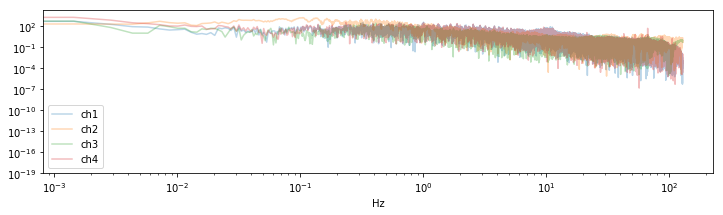

In [63]:
df_per.plot(logx=True,logy=True,alpha=0.3,figsize=(12,3))

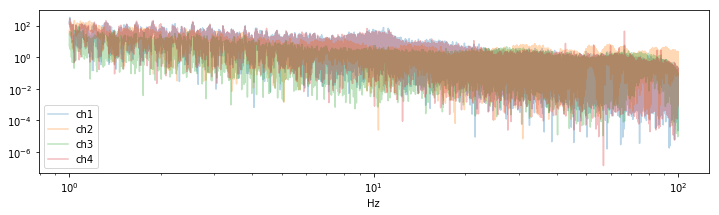

In [68]:
df_per.loc[1:100].plot(logx=True,logy=True,figsize=(12,3),alpha=0.3)

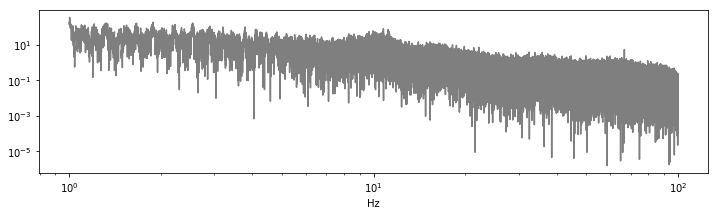

In [78]:
df_per['ch1'].loc[1:100].plot(logx=True,logy=True,figsize=(12,3),alpha=0.5,c='k')

In [ ]:
# now: 
# bandpass filter
# etc.
# as with eeg notebooks